###import data



In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.image as img

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/AI/Final_Project'

In [ ]:
label = []
label = os.listdir(file_path)

img_path = []
for i in label:
  img_path.append(file_path + '/' + i)  

In [ ]:
df = pd.DataFrame(columns = ['img_path', 'label', 'char1', 'char2', 'char3', 'char4', 'char5'])
df['img_path'] = img_path
df['label'] = label
df['label'] = df['label'].str.split('.').str[0]

In [ ]:
for i,e in enumerate(df['label']):
  temp = list(e)
  df['char1'][i] = temp[0]
  df['char2'][i] = temp[1]
  df['char3'][i] = temp[2]
  df['char4'][i] = temp[3]
  df['char5'][i] = temp[4]

In [ ]:
df.head()

,img_path,label,char1,char2,char3,char4,char5
0,/content/drive/MyDrive/AI/Final_Project/268g2.png,268g2,2,6,8,g,2
1,/content/drive/MyDrive/AI/Final_Project/2fxgd.png,2fxgd,2,f,x,g,d
2,/content/drive/MyDrive/AI/Final_Project/2cegf.png,2cegf,2,c,e,g,f
3,/content/drive/MyDrive/AI/Final_Project/3bfnd.png,3bfnd,3,b,f,n,d
4,/content/drive/MyDrive/AI/Final_Project/34fxm.png,34fxm,3,4,f,x,m


###EDA

In [ ]:
data = pd.DataFrame(df['char1'].value_counts()+df['char2'].value_counts()+df['char3'].value_counts()+df['char4'].value_counts()+df['char5'].value_counts()).reset_index()
data.columns = ['character', 'count']

In [ ]:
data

,character,count
0,2,270
1,3,271
2,4,289
3,5,288
4,6,267
5,7,262
6,8,272
7,b,247
8,c,276
9,d,269


In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

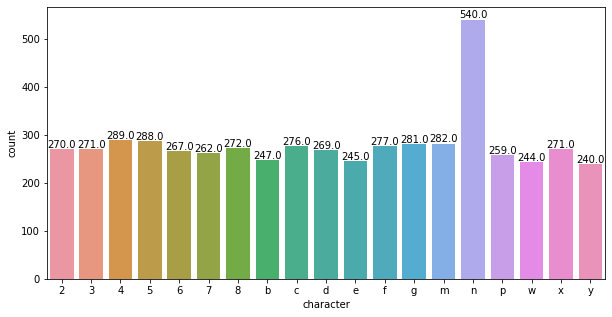

In [ ]:
plt.figure(figsize=(10, 5))
graph = sns.barplot(data=data, x='character', y='count')
show_values(graph)

In [ ]:
print("Number of images: ", len(df['img_path']))
print("Number of unique characters: ", len(data['count']))

Number of images:  1070
Number of unique characters:  19


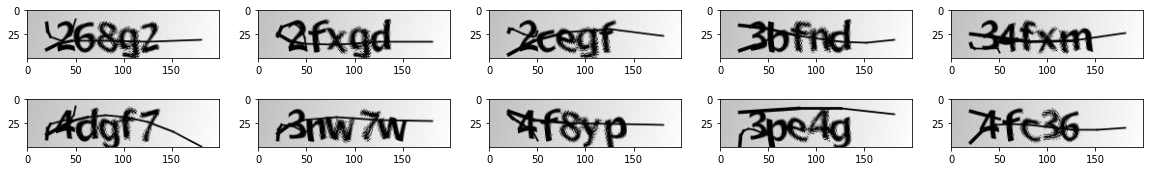

In [ ]:
plt.figure(figsize=(20, 3))
for i, e in enumerate(df['img_path'][0:10]):
  sample_img = cv2.imread(e, 0)
  plt.subplot(2, 5, i+1)
  plt.imshow(sample_img, cmap='gray')

###Encodeing

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['encode_num']= label_encoder.fit_transform(df['char1'])
  
df.head()

,img_path,label,char1,char2,char3,char4,char5,encode_num
0,/content/drive/MyDrive/AI/Final_Project/268g2.png,268g2,2,6,8,g,2,0
1,/content/drive/MyDrive/AI/Final_Project/2fxgd.png,2fxgd,2,f,x,g,d,0
2,/content/drive/MyDrive/AI/Final_Project/2cegf.png,2cegf,2,c,e,g,f,0
3,/content/drive/MyDrive/AI/Final_Project/3bfnd.png,3bfnd,3,b,f,n,d,1
4,/content/drive/MyDrive/AI/Final_Project/34fxm.png,34fxm,3,4,f,x,m,1


In [ ]:
keys = pd.DataFrame(df['char1'].unique(),columns = ["char"])

In [ ]:
keys['num'] = df['encode_num'].unique()

In [ ]:
keys

,char,num
0,2,0
1,3,1
2,4,2
3,5,3
4,6,4
5,7,5
6,8,6
7,b,7
8,c,8
9,d,9


In [ ]:
keys = dict(keys.values)

In [ ]:
encoded_label = []
for i in df['label']:
  encoded_label.append(list(map(lambda x: keys[x], list(i))))

df['encoded_label'] = encoded_label

In [ ]:
df.head()

,img_path,label,char1,char2,char3,char4,char5,encode_num,encoded_label
0,/content/drive/MyDrive/AI/Final_Project/268g2.png,268g2,2,6,8,g,2,0,"[0, 4, 6, 12, 0]"
1,/content/drive/MyDrive/AI/Final_Project/2fxgd.png,2fxgd,2,f,x,g,d,0,"[0, 11, 17, 12, 9]"
2,/content/drive/MyDrive/AI/Final_Project/2cegf.png,2cegf,2,c,e,g,f,0,"[0, 8, 10, 12, 11]"
3,/content/drive/MyDrive/AI/Final_Project/3bfnd.png,3bfnd,3,b,f,n,d,1,"[1, 7, 11, 14, 9]"
4,/content/drive/MyDrive/AI/Final_Project/34fxm.png,34fxm,3,4,f,x,m,1,"[1, 2, 11, 17, 13]"


###Normalize

In [ ]:
all_img = []

In [ ]:
for i, e in enumerate(df['img_path']):
  all_img.append(cv2.imread(e, 0))

In [ ]:
all_img[1]

array([[192, 192, 192, ..., 251, 251, 251],
       [192, 192, 192, ..., 251, 251, 251],
       [192, 192, 192, ..., 251, 251, 251],
       ...,
       [195, 195, 195, ..., 254, 254, 254],
       [195, 195, 195, ..., 254, 254, 254],
       [195, 195, 195, ..., 254, 254, 254]], dtype=uint8)

In [ ]:
all_img_ar = np.array(all_img)

In [ ]:
all_img_ar.shape

(1070, 50, 200)

In [ ]:
img_nor = all_img_ar.astype('float32')/255 # Normalize

In [ ]:
img_nor[1]

array([[0.7529412 , 0.7529412 , 0.7529412 , ..., 0.9843137 , 0.9843137 ,
        0.9843137 ],
       [0.7529412 , 0.7529412 , 0.7529412 , ..., 0.9843137 , 0.9843137 ,
        0.9843137 ],
       [0.7529412 , 0.7529412 , 0.7529412 , ..., 0.9843137 , 0.9843137 ,
        0.9843137 ],
       ...,
       [0.7647059 , 0.7647059 , 0.7647059 , ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.7647059 , 0.7647059 , 0.7647059 , ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.7647059 , 0.7647059 , 0.7647059 , ..., 0.99607843, 0.99607843,
        0.99607843]], dtype=float32)

###Preorocess Data

####dialate

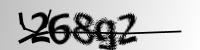

In [ ]:
cv2_imshow(all_img[0])

In [ ]:
test_img = all_img[0]

In [ ]:
test = cv2.dilate(test_img, None, iterations=1)

In [ ]:
test = cv2.adaptiveThreshold(test,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

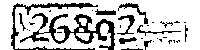

In [ ]:
cv2_imshow(test)

In [ ]:
all_img.append(cv2.imread(e, 0))

In [ ]:
dilated = []
for i in all_img:
  dilated.append(cv2.dilate(i, None, iterations=1))

In [ ]:
gauss_pic = cv2.adaptiveThreshold(pic,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

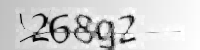

In [ ]:
cv2_imshow(dilated[0])

In [ ]:
image_list = [dilated[0][10:50, 30:50], dilated[0][10:50, 50:70], dilated[0][10:50, 70:90], dilated[0][10:50, 90:110], dilated[0][10:50, 110:130]]

In [ ]:
X = []
y = []

for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))

In [ ]:
cv2_imshow(X[4])

normalize

In [ ]:
dila_ar = np.array(dilated)

In [ ]:
dila_nor = dila_ar.astype('float32')/255 # Normalize

In [ ]:
dila_nor[1]

array([[0.7529412 , 0.7529412 , 0.75686276, ..., 0.9843137 , 0.9843137 ,
        0.9843137 ],
       [0.7529412 , 0.7529412 , 0.75686276, ..., 0.9843137 , 0.9843137 ,
        0.9843137 ],
       [0.7529412 , 0.7529412 , 0.75686276, ..., 0.9843137 , 0.9843137 ,
        0.9843137 ],
       ...,
       [0.7647059 , 0.7647059 , 0.76862746, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.7647059 , 0.7647059 , 0.76862746, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.7647059 , 0.7647059 , 0.76862746, ..., 0.99607843, 0.99607843,
        0.99607843]], dtype=float32)

####CV 2

In [ ]:
pic = all_img[0]
pic = cv2.medianBlur(pic,5)

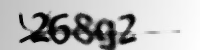

In [ ]:
cv2_imshow(pic)

In [ ]:
gauss_pic = cv2.adaptiveThreshold(pic,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

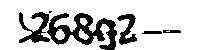

In [ ]:
cv2_imshow(gauss_pic)

In [ ]:
cv2.rectangle(gauss_pic, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_pic, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_pic, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_pic, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_pic, (110,12),(130,49),0, 1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

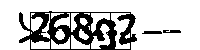

In [ ]:
cv2_imshow(gauss_pic)

In [ ]:
gu = []
for i in all_img:
  gu.append(cv2.adaptiveThreshold(cv2.medianBlur(i,5),255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2))

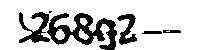

In [ ]:
cv2_imshow(gu[0])

In [ ]:
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator

In [ ]:
image_list = [gu[0][10:50, 30:50], gu[0][10:50, 50:70], gu[0][10:50, 70:90], gu[0][10:50, 90:110], gu[0][10:50, 110:130]]

In [ ]:
X = []
y = []

for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))

In [ ]:
X = np.array(X)

In [ ]:
X[1]

In [ ]:
print(X.shape)

(5, 40, 20, 1)


In [ ]:
cv2_imshow(X[4])

TypeError: ignored

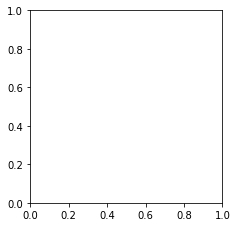

In [ ]:
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

In [ ]:
X = []
y = []

for image in os.listdir(path) :
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    
    for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))
        y.append(image[i])
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)
(5200, 40, 20, 1)
(5200,)

normalize

In [ ]:
gu

In [ ]:
gu_arr = np.array(gu)

In [ ]:
gu_nor = gu_arr.astype('float64')/255 # Normalize

In [ ]:
gu_nor[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

###train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dila_nor, encoded_label, test_size = 0.2, random_state = 30)

NameError: ignored

In [ ]:
print('Train_set Feature shape: %s'%str(x_train.shape))
print('Test_set Feature shape: %s'%str(x_test.shape))

Train_set Feature shape: (856, 50, 200)
Test_set Feature shape: (214, 50, 200)


In [ ]:
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D, Flatten, Conv2D, Dropout, Dense

In [ ]:
def build_model():
    
    # Inputs to the model
    input_img = layers.Input(shape=(50,200,1), name="image", dtype="float32") 

    # First conv block
    x = layers.Conv2D(32,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv1")(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(64,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv2")(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    x = layers.Reshape(target_shape=(5, 7680), name="reshape")(x)

    # FC layers
    x = layers.Dense(256, activation="relu", name="dense1")(x)
    x = layers.Dense(64, activation="relu", name="dense2")(x)
   
    # Output layer
    output = layers.Dense(19, activation="softmax", name="dense3")(x) 
    
    # Define the model
    model = keras.models.Model(inputs=input_img, outputs=output, name="ocr_classifier_based_model")
    
    # Compile the model and return
    model.compile(optimizer=keras.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics="accuracy")
    return model


# Get the model
model = build_model()
model.summary()

In [ ]:
x_train.shape

(856, 50, 200)

In [ ]:
type(y_train)

list

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
type(df['encoded_label'])

pandas.core.series.Series

In [ ]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs=30)

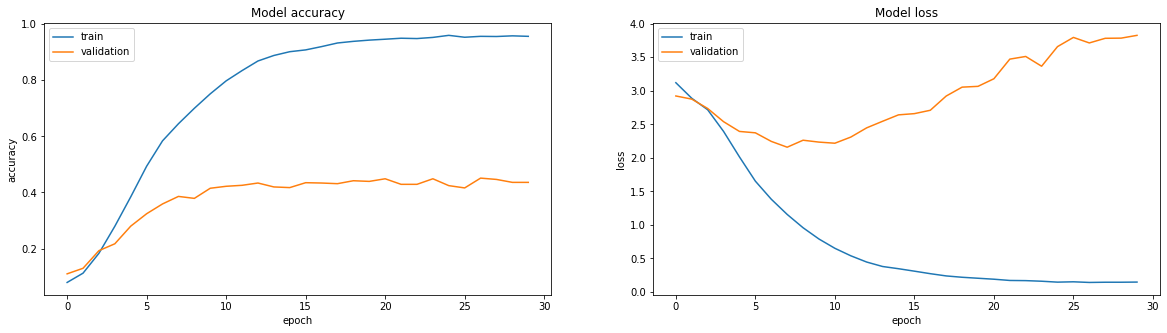

In [ ]:
fig=plt.figure(figsize=(20, 5))
# summarize history for accuracy
fig.add_subplot(1, 2, 1)
#plt.plot(history.history['sparse_categorical_accuracy'])
#plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 26ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=2)

In [ ]:
y_pred[5]

array([6, 0, 1, 7, 7])

In [ ]:
y_test[5]

array([ 6,  0,  1, 15,  0])